# 2.5 Automatic Differentiation

In [1]:
import torch

### 2.5.1 A Simple Function

$y = 2x^{\top}x$

In [3]:
x = torch.arange(4.0)
x

tensor([0., 1., 2., 3.])

In [5]:
#Cal also create x = torch.arange(4.0,requires_grad=True)
x.requires_grad_(True)
x.grad #the gradient is None by default

In [ ]:
y = 2*torch.dot(x,x)
y

tensor(28., grad_fn=<MulBackward0>)

In [ ]:
y.backward() #Take gradient of y with respect to x by calling its backward method
x.grad

tensor([ 0.,  8., 16., 24.])

In [ ]:
x.grad == 4*x

tensor([ True, False, False, False])

In [ ]:
x.grad.zero_()#Reset the gradient
y = x.sum()
y.backward()
x.grad

tensor([1., 1., 1., 1.])

### 2.5.2. Backward for Non-Scalar Variables

In [ ]:
x.grad.zero_()
y = x*x
y.backward(gradient=torch.ones(len(y)))#Faster: y.sum().backward()
x.grad

tensor([0., 2., 4., 6.])

### 2.5.3. Detaching Computation

In [ ]:
x.grad.zero_()
y =x*x
u = y.detach()
z = u*x

z.sum().backward()
x.grad == u

tensor([True, True, True, True])

In [ ]:
x.grad.zero_()
y.sum().backward()
x.grad == 2*x

tensor([True, True, True, True])

### 2.5.4. Gradients and Python Control Flow

In [ ]:
def f(a):
  b = a*2

  while b.norm()<1000:
    b = b*2
  if b.sum()>0:
    c = b
  else:
    c = 100*b
  return c

In [ ]:
a = torch.randn(size=(),requires_grad=True)
d = f(a)
d.backward()

In [ ]:
a.grad == d/a

tensor(True)

## Discussions & Exercises

* As we pass data through each successive function, the framework builds a computational graph that tracks how each value depends on others. To calculate derivatives, **automatic differentiation** works backwards through this graph applying the chain rule. The computational algorithm for applying the chain rule in this fashion is called **backpropagation**.
* We avoid allocating new memory every time we take a derivative because deep learning requires successively computing derivatives with respect to the same parameters a great many times, and we might risk running out of memory
* PyTorch does not automatically reset the gradient buffer when we record a new gradient. Instead, the new gradient is added to the already-stored gradient.
* One benefit of using automatic differentiation is that even if building the computational graph of a function required passing through a maze of Python control flow, we can still calculate the gradient of the resulting variable
*Try to remember these basics:
  1. Attach gradients to those variables with respect to which we desire derivatives
  2. Record the computation of the target value
  3. Execute the backpropagation function
  4. Access the resulting gradient

### Exercises

1. After running the function for backpropagation, immediately run it again and see what happens. Investigate.

In [ ]:
x.grad.zero_()
y = x*x
y.backward(gradient=torch.ones(len(y)))#Faster: y.sum().backward()
x.grad

tensor([0., 2., 4., 6.])

In [ ]:
y.backward(gradient=torch.ones(len(y)))

RuntimeError: Trying to backward through the graph a second time (or directly access saved tensors after they have already been freed). Saved intermediate values of the graph are freed when you call .backward() or autograd.grad(). Specify retain_graph=True if you need to backward through the graph a second time or if you need to access saved tensors after calling backward.

When performing an operation, pytorch builds a computation graph to keep track of the operations and intermediate values needed to compute gradients later. But after running the backpropagation, pytorch frees the intermediate values to save memory. So when trying to run backward() again, pytorch tries to traverse the same computation graph, but the values are no longer available.
To be able to run backward() again, you need to specify retain_graph=True, which keeps the computation graph for later backward passes.

2. Let $f(x) = sin(x)$ Plot the graph of $f$ and of its derivative $f'$. Do not exploit the fact that $f'(x) = cos(x)$ but rather use automatic differentiation to get the result

In [24]:
x = torch.arange(4.0, requires_grad=True)
y = torch.sin(x)
y.backward(torch.ones(len(x)))# (torch.ones_like(x))
df = x.grad #f'(x)

<ipython-input-25-5dfe79470103>:10: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x_np,y_np, 'bo-',label="f(x) = sin(x)",color='blue')#f(x)
<ipython-input-25-5dfe79470103>:11: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x_np,df_np,'bo-',label="f'(x)",color='red')#f'(x)


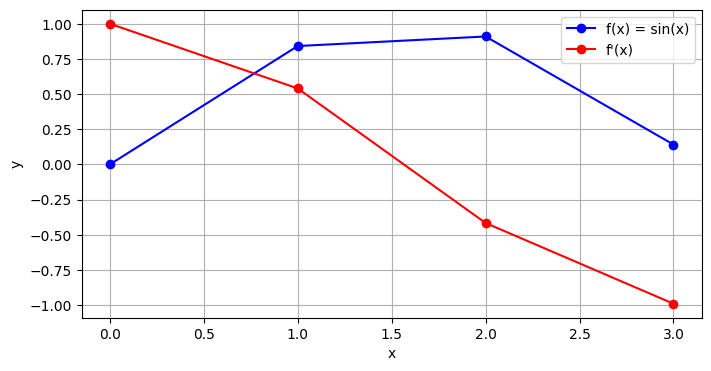

In [25]:
#plotting
import matplotlib.pyplot as plt

#tensors to numpy arrays
x_np = x.detach().numpy()
y_np = y.detach().numpy()
df_np = df.detach().numpy()

plt.figure(figsize=(8,4))
plt.plot(x_np,y_np, 'bo-',label="f(x) = sin(x)",color='blue')#f(x)
plt.plot(x_np,df_np,'bo-',label="f'(x)",color='red')#f'(x)
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()